In [1]:
#google drive connect

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [107]:
#Import section

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML classification models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D,BatchNormalization
from tensorflow.keras.optimizers import Adam

#ML evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

seed=42

**Data collection:-**

**About Dataset-**

https://www.kaggle.com/datasets/ziya07/network-traffic-anomaly-detection-dataset/data


This dataset contains network traffic data generated for the purpose of anomaly detection in embedded systems, specifically targeting security threats such as malicious activities. It includes both normal and anomalous (malicious) behavior, which are labeled accordingly for supervised learning tasks. The data encompasses various network traffic features such as packet size, inter-arrival times, protocol types, source and destination IPs, TCP flags, and additional frequency-domain characteristics derived from the Wavelet Transform (WT) method.

The dataset is designed to simulate real-world scenarios involving embedded systems in networked environments, particularly within Internet of Things (IoT) applications, industrial control systems, and critical infrastructure networks. It aims to support the development of advanced anomaly detection models based on deep learning techniques like the Adaptive Differential Evolution Weighted Deep Belief Network (ADE-WDBN), providing both time and resource-efficient solutions to network security challenges.

Key Features:

Packet Size: Size of the network packet in bytes.

Inter-Arrival Time: Time difference between consecutive packets.

Protocol Type: Type of protocol used (TCP, UDP, ICMP).

Source and Destination IP: IP addresses of the source and destination systems.

TCP Flags: Flags in the TCP header indicating the state of the connection.

Packet Count (5s): Number of packets transmitted in a 5-second window.

Spectral Entropy: Frequency-domain feature extracted using Wavelet Transform.

Frequency Band Energy: Energy within different frequency bands derived from Wavelet Transform.

Target Column:
Label: 0 for normal traffic, 1 for anomalous (malicious) traffic.


In [113]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/embedded_system_network_security_dataset.csv')
data.head(10)

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False
5,0.568361,0.207250,2619,53,0.928571,0.0,0.113375,0.582346,0.0,True,False,True,False,False,False,False,False,False
6,0.571940,0.363908,14582,53,0.714286,0.0,0.874457,0.760548,0.0,False,False,True,False,False,False,False,True,False
7,0.173228,0.075335,5724,443,0.428571,0.0,0.541747,0.175055,0.0,False,False,True,False,True,False,False,False,True
8,0.967788,0.493461,28474,443,0.071429,0.0,0.330655,0.023906,0.0,False,False,False,False,False,False,True,False,False
9,0.364352,0.434362,22620,443,0.571429,0.0,0.056789,0.172246,0.0,False,True,False,True,False,True,False,False,False


**Statistical Analysis:-**

In [114]:
#Summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

In [115]:
#size of dataset

data.shape

(1000, 18)

In [116]:
#Describe dataset

data.describe()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.00000
mean,0.502446,0.512259,32024.617000,199.769000,0.506857,0.0,0.495222,0.485651,0.10000
std,0.289606,0.281130,18520.890349,180.078488,0.303271,0.0,0.292927,0.295953,0.30015
min,0.000000,0.000000,1038.000000,53.000000,0.000000,0.0,0.000000,0.000000,0.00000
25%,0.256263,0.275909,16245.250000,53.000000,0.267857,0.0,0.236912,0.228039,0.00000
50%,0.499642,0.515971,31883.000000,80.000000,0.500000,0.0,0.504290,0.467905,0.00000
75%,0.741410,0.746523,47746.250000,443.000000,0.785714,0.0,0.761556,0.750876,0.00000
max,1.000000,1.000000,65484.000000,443.000000,1.000000,0.0,1.000000,1.000000,1.00000


In [117]:
#Check frequency of label

data['label'].value_counts()

,count
label,
0.0,900
1.0,100


Observations-
1. packet_size, inter_arrival_time, packet_count_5s are having min value as 0. Let's explore those records.

In [118]:
data[data['packet_size']==0]

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
676,0.0,0.708424,52651,80,0.928571,0.0,0.907368,0.552525,0.0,True,False,False,True,False,True,True,False,False
865,0.0,0.766584,13648,80,0.357143,0.0,0.895147,0.134122,0.0,False,True,False,True,False,True,True,False,False


In [119]:
data[data['inter_arrival_time']==0]

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
326,0.830351,0.0,34637,53,0.857143,0.0,0.175661,0.754624,0.0,True,False,False,True,True,False,False,False,False


In [120]:
data['mean_packet_size'].value_counts()

,count
mean_packet_size,
0.0,1000


In [121]:
#Dropping mean_packet_size as all values are same

data.drop('mean_packet_size', axis=1, inplace=True)

In [122]:
data[data['label']==1]

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
22,0.332140,0.737741,30522,443,0.142857,0.838940,0.926323,1.0,True,False,False,False,False,False,False,True,False
36,0.602720,0.379021,33932,443,0.357143,0.398420,0.992393,1.0,False,True,False,False,False,False,False,True,False
38,0.865426,0.754303,1168,53,0.000000,0.524607,0.920811,1.0,True,False,False,False,False,False,False,True,False
42,0.670007,0.242828,31596,53,0.071429,0.185225,0.388991,1.0,True,False,False,True,False,False,False,False,True
69,0.494631,0.061750,9357,443,1.000000,0.682724,0.338845,1.0,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.023622,0.220933,11049,80,0.285714,0.224904,0.319165,1.0,True,False,False,True,False,True,False,True,False
977,0.905512,0.298058,38405,80,0.000000,0.166804,0.253235,1.0,False,True,False,True,False,True,False,False,False
985,0.109520,0.364819,59560,443,0.142857,0.431495,0.130944,1.0,False,False,False,True,False,True,False,False,True
988,0.713672,0.516231,38102,80,0.285714,0.176585,0.484657,1.0,False,True,True,False,True,False,False,False,False


In [123]:
data[data['label']==0]

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.103794,0.078032,26435,443,0.428571,0.339083,0.402062,0.0,False,True,False,False,True,False,False,True,False
996,0.727989,0.048901,49767,80,0.928571,0.094822,0.418902,0.0,False,False,False,True,True,False,False,False,True
997,0.952756,0.731936,53507,80,0.928571,0.016880,0.441276,0.0,False,True,False,True,True,False,False,False,False
998,0.322835,0.655933,17255,53,0.071429,0.887533,0.806790,0.0,False,False,False,True,False,True,False,False,True


In [124]:
#Check n/a values

data.isna().sum()

,0
packet_size,0
inter_arrival_time,0
src_port,0
dst_port,0
packet_count_5s,0
spectral_entropy,0
frequency_band_energy,0
label,0
protocol_type_TCP,0
protocol_type_UDP,0


In [125]:
#Convert boolean values using label encoding

label_encoder = LabelEncoder()
data['protocol_type_TCP'] = label_encoder.fit_transform(data['protocol_type_TCP'])
data['protocol_type_UDP'] = label_encoder.fit_transform(data['protocol_type_UDP'])
data['src_ip_192.168.1.2'] = label_encoder.fit_transform(data['src_ip_192.168.1.2'])
data['src_ip_192.168.1.3'] = label_encoder.fit_transform(data['src_ip_192.168.1.3'])
data['dst_ip_192.168.1.5'] = label_encoder.fit_transform(data['dst_ip_192.168.1.5'])
data['dst_ip_192.168.1.6'] = label_encoder.fit_transform(data['dst_ip_192.168.1.6'])
data['tcp_flags_FIN'] = label_encoder.fit_transform(data['tcp_flags_FIN'])
data['tcp_flags_SYN'] = label_encoder.fit_transform(data['tcp_flags_SYN'])
data['tcp_flags_SYN-ACK'] = label_encoder.fit_transform(data['tcp_flags_SYN-ACK'])

In [126]:
data.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.834066,0.534891,0.0,0,1,1,0,0,0,0,0,0
1,0.527559,0.741288,59382,443,0.785714,0.147196,0.990757,0.0,0,1,0,0,0,1,0,1,0
2,0.226199,0.485116,65484,80,0.285714,0.855192,0.031781,0.0,0,1,0,0,1,0,0,0,0
3,0.573372,0.450965,51707,53,0.142857,0.153220,0.169958,0.0,0,0,0,1,0,0,0,0,0
4,0.651396,0.888740,26915,53,0.714286,0.923916,0.552053,0.0,1,0,0,1,0,0,0,1,0


No null or na values

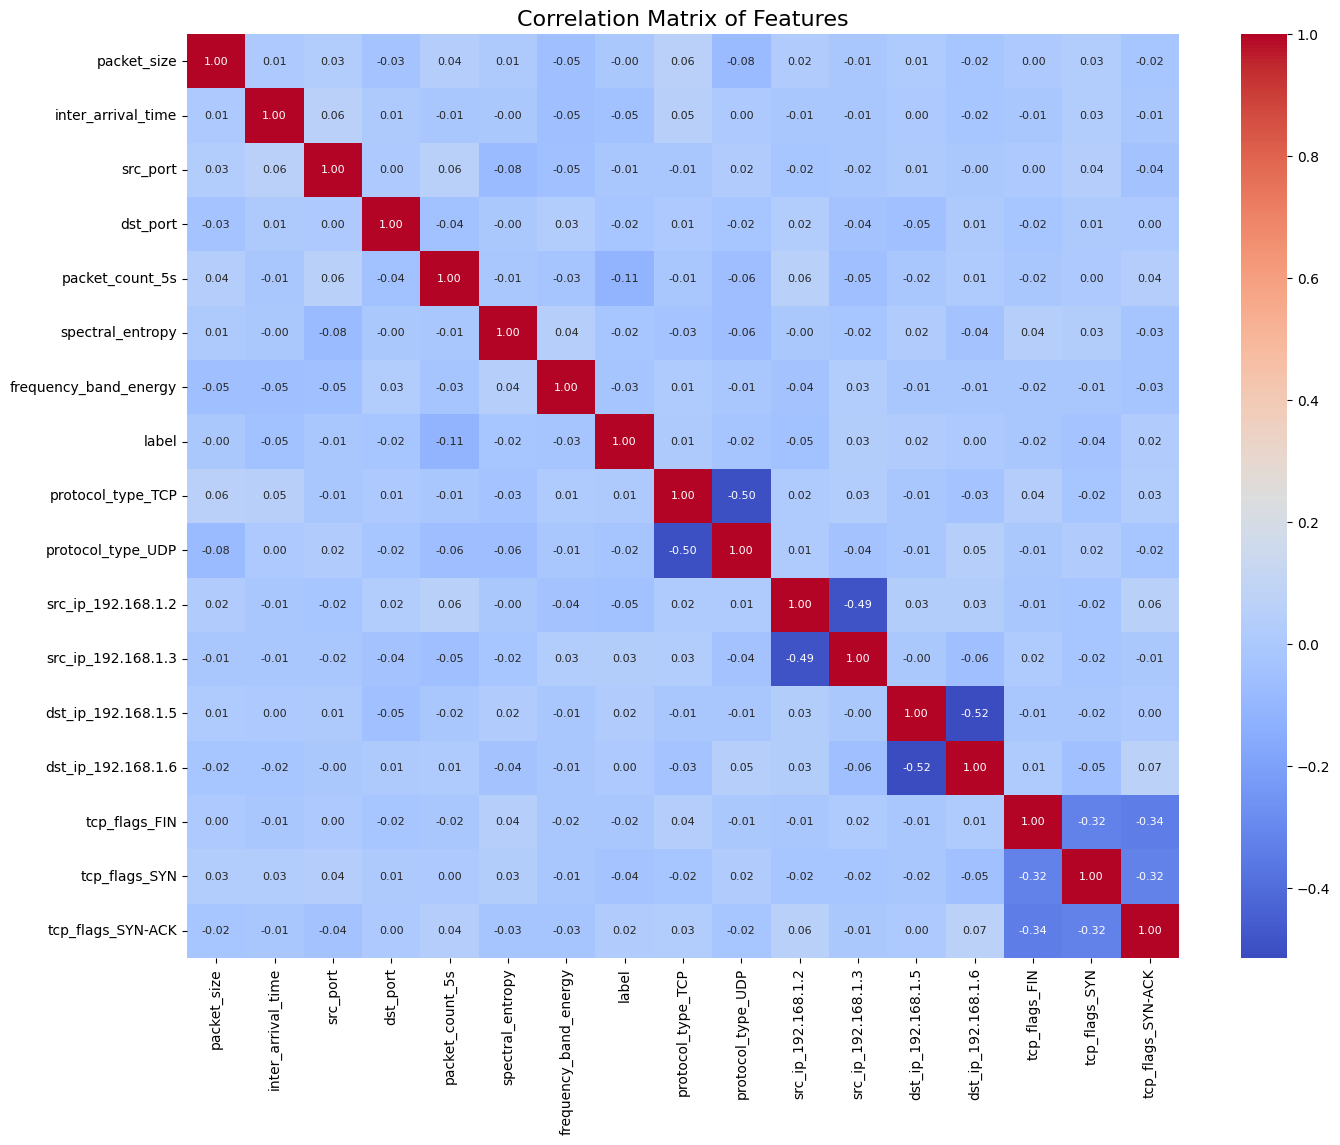

In [127]:
plt.figure(figsize=(16, 12)) # Increase figure size
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8}) # Add formatting for annotations, colormap, and font size
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.show()

Observations-

i. There is no direct correlation of any features with "Label".
ii. src_ip fields are correlated.
iii. dst_ip fields are correlated.
iv. tcp_flag fields are correlated.

It means there is huge possibility of PCA.

In [128]:
#Create a function to check value_counts for all fields

def value_counts(df):
  for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n")


In [129]:
value_counts(data)

Value counts for column 'packet_size':
packet_size
0.332140    5
0.442377    4
0.117394    4
0.317108    4
0.183250    4
           ..
0.982105    1
0.619184    1
0.594130    1
0.200429    1
0.225483    1
Name: count, Length: 698, dtype: int64


Value counts for column 'inter_arrival_time':
inter_arrival_time
0.186102    1
0.620362    1
0.741288    1
0.485116    1
0.450965    1
           ..
0.180189    1
0.699422    1
0.268745    1
0.434362    1
0.493461    1
Name: count, Length: 1000, dtype: int64


Value counts for column 'src_port':
src_port
48270    2
21324    2
21320    2
43103    2
18277    2
        ..
27101    1
60139    1
36161    1
33153    1
42732    1
Name: count, Length: 995, dtype: int64


Value counts for column 'dst_port':
dst_port
443    353
80     337
53     310
Name: count, dtype: int64


Value counts for column 'packet_count_5s':
packet_count_5s
0.071429    78
0.928571    77
0.857143    77
0.571429    76
0.642857    74
0.714286    71
0.285714    69
0.357143    68
0

Observations-

1. Most of boolean fields are imbalanced.
2. Label is also imbalanced.

In [130]:
#Create a function to check outliers

def check_outliers(df):
  for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

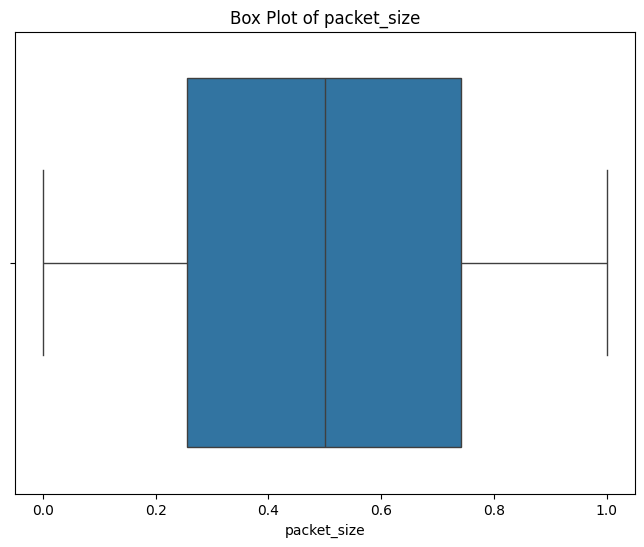

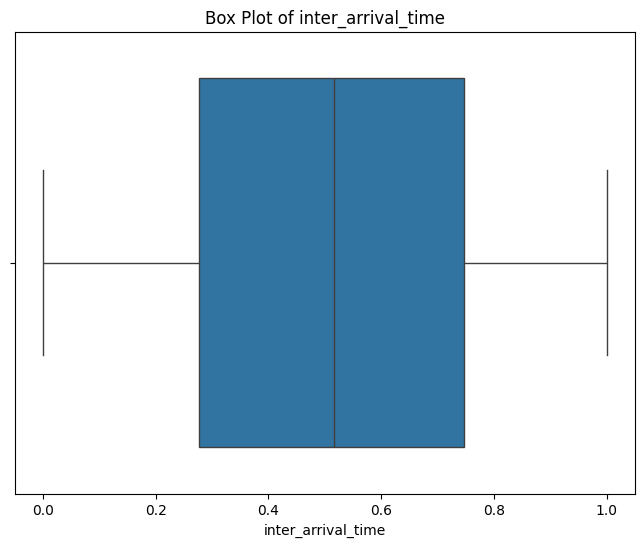

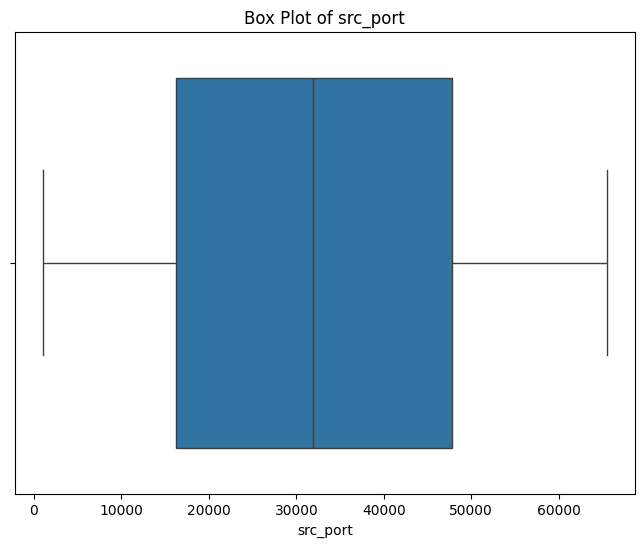

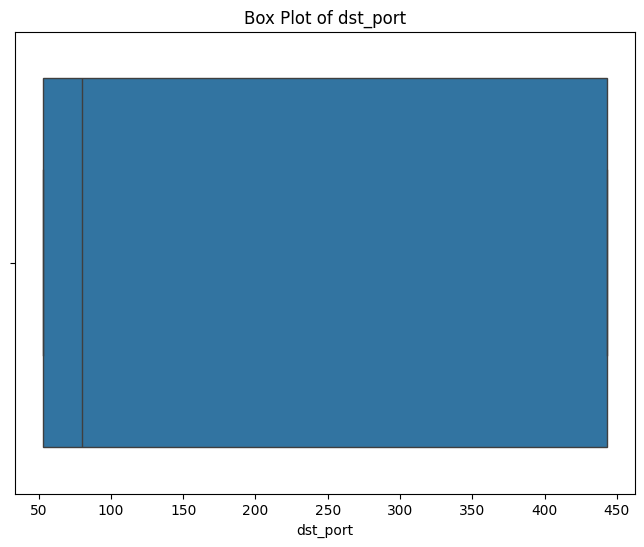

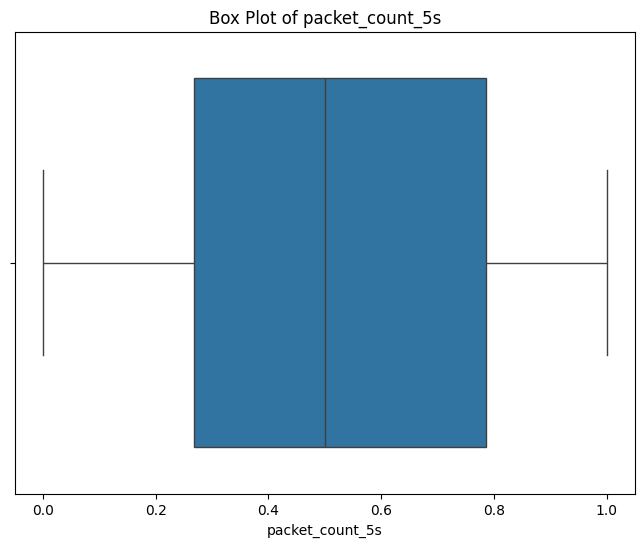

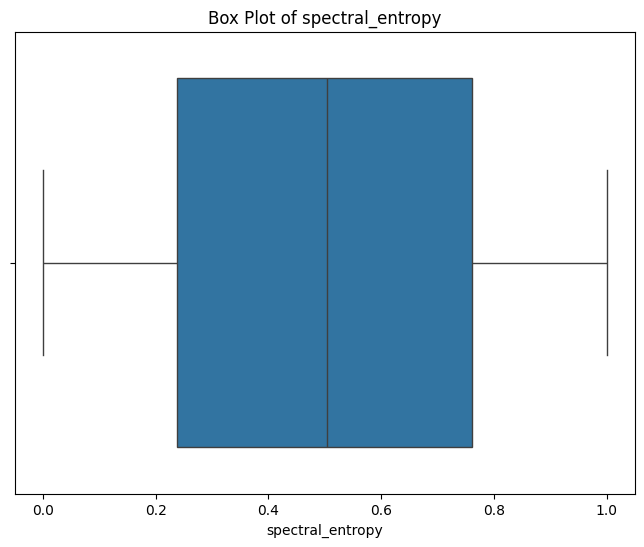

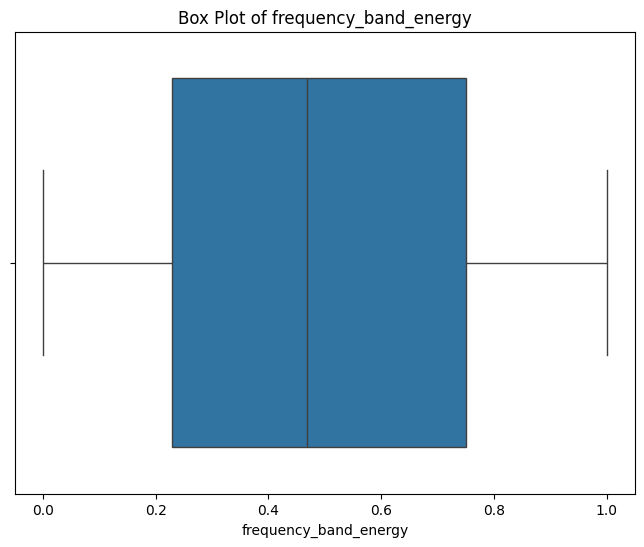

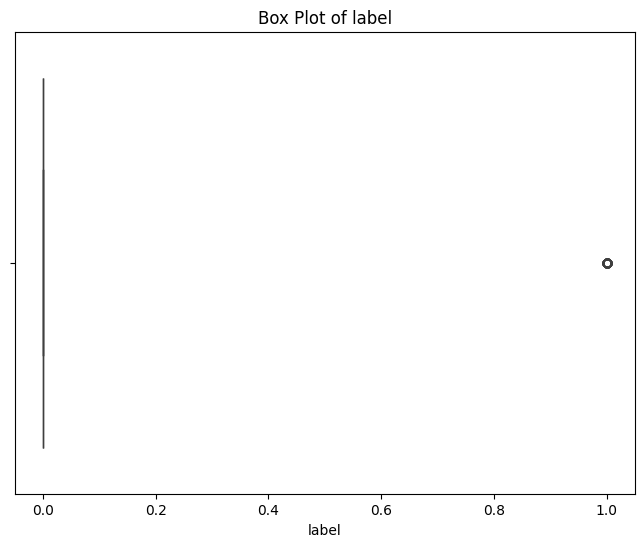

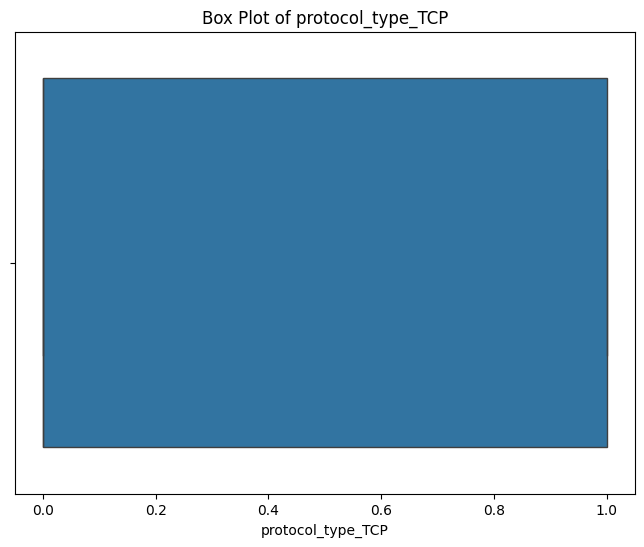

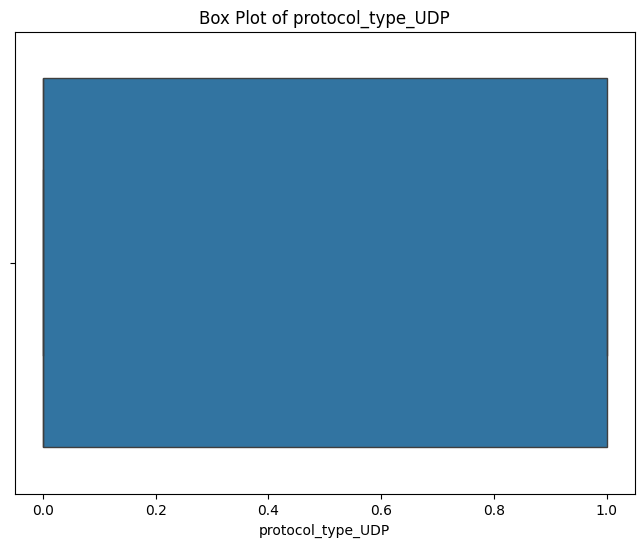

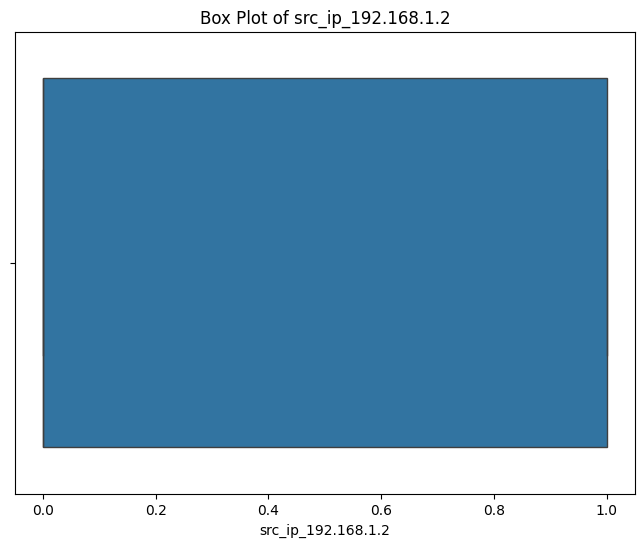

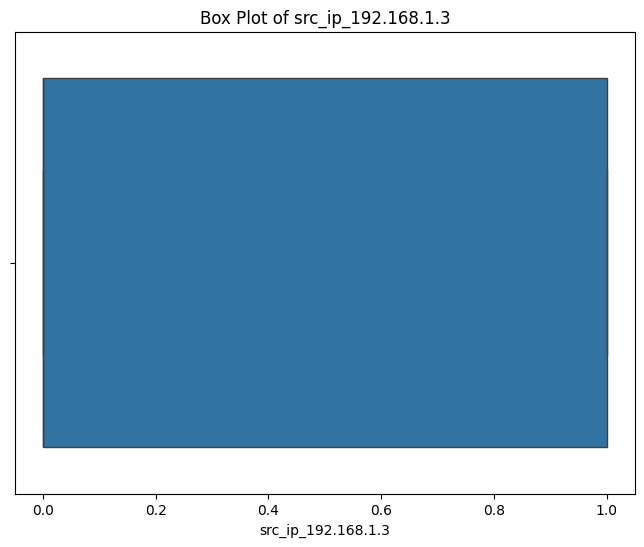

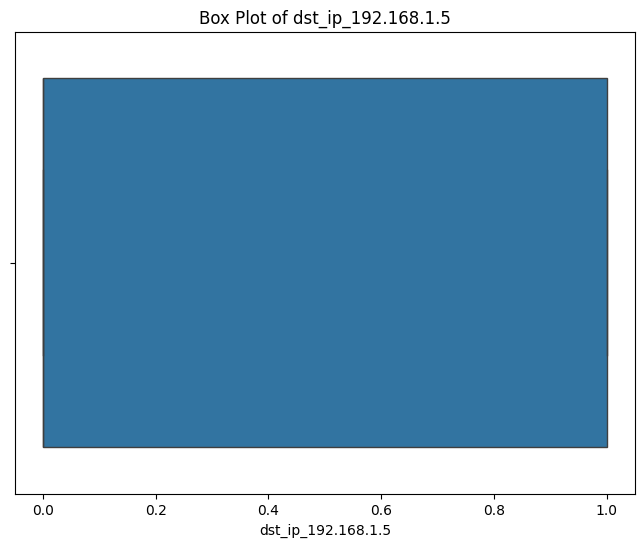

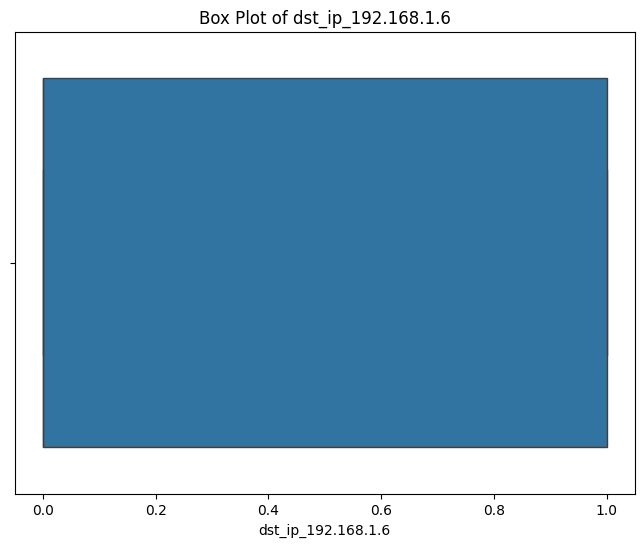

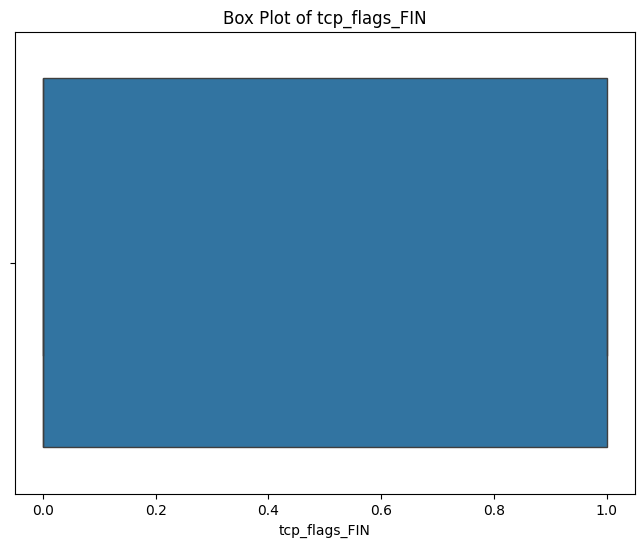

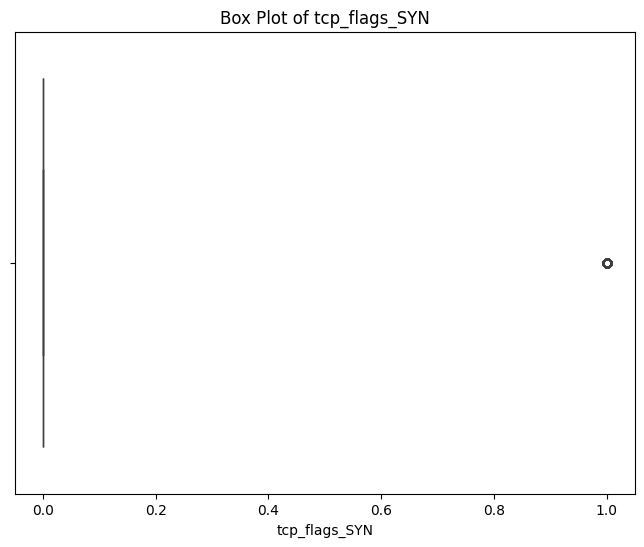

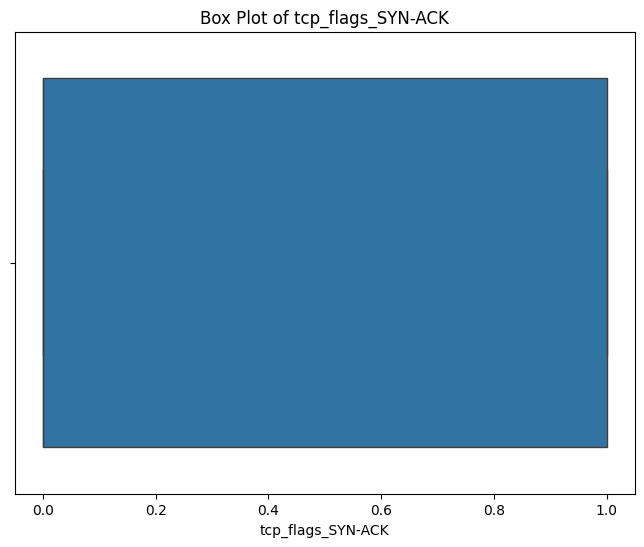

In [63]:
check_outliers(data)

Observations-

The dataset does not seem to have any outlier problem.

**Anomaly detection algorithms:-**

In [131]:
#Define features and target

X=data.drop('label', axis=1)
y=data['label']

print(X.shape)
print(y.shape)

(1000, 16)
(1000,)


In [132]:
#Applying standard scaling to normalize the data

scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X.shape)
print(X)

(1000, 16)
[[-0.33611459  0.38472447  1.65001067 ... -0.57888987 -0.55424682
  -0.58504861]
 [ 0.08675815  0.81508034  1.4778486  ... -0.57888987  1.8042503
  -0.58504861]
 [-0.95434959 -0.09659806  1.80747926 ... -0.57888987 -0.55424682
  -0.58504861]
 ...
 [ 1.55568452  0.78180053  1.16048051 ... -0.57888987 -0.55424682
  -0.58504861]
 [-0.62050269  0.51131651 -0.79785621 ... -0.57888987 -0.55424682
   1.70925967]
 [-1.12498245 -1.16074428 -1.31931225 ... -0.57888987  1.8042503
  -0.58504861]]


In [133]:
#Using train and test split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(750, 16)
(250, 16)


As target variable is highly imbalanced, considering **SMOTE** method to use.

In [134]:
#Define function to call all ML Models

def ML_Models(X_train, X_test, y_train, y_test):

  ratio=y_train.value_counts()[0]/y_train.value_counts()[1]

  models={
      "LogReg":LogisticRegression(multi_class='auto',solver='saga', max_iter=100,class_weight='balanced'),
      "KNN": KNeighborsClassifier(),
      "DecTreeCls":DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),
      "RanForCls":RandomForestClassifier(n_estimators=100, max_depth=5),
      "SGDCls": SGDClassifier(random_state=seed),
      "SVC": SVC(random_state=seed),
      "XGBoost": XGBClassifier(scale_pos_weight=ratio),
      "LightGBM": LGBMClassifier(scale_pos_weight=ratio),
      "CatBoost": CatBoostClassifier(scale_pos_weight=ratio)
  }

  names = []
  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []

  for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted')) # Use weighted for multi-class
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    names.append(name)

  result_df=pd.DataFrame({
      'model': names,
      'accuracy': accuracy_scores,
      'precision': precision_scores,
      'recall': recall_scores,
      'f1_score': f1_scores
  })
  return result_df

In [135]:
#Verifying accuracy with Logistric Regression method

ML_Models(X_train, X_test, y_train, y_test)

[LightGBM] [Info] Number of positive: 76, number of negative: 674
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101333 -> initscore=-2.182497
[LightGBM] [Info] Start training from score -2.182497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Learning rate set to 0.009111
0:	learn: 0.6910525	total: 23.9ms	remaining: 23.9s
1:	learn: 0.6889518	total: 31.8ms	remaining: 15.9s
2:	learn: 0.6858798	total: 38.7ms	remaining: 12.9s
3:	learn: 0.6827191	total: 44.9ms	remaini

,model,accuracy,precision,recall,f1_score
0,LogReg,0.556,0.836335,0.556,0.646152
1,KNN,0.888,0.815805,0.888,0.850373
2,DecTreeCls,0.848,0.821145,0.848,0.834122
3,RanForCls,0.904,0.817216,0.904,0.858420
4,SGDCls,0.812,0.821927,0.812,0.816901
5,SVC,0.904,0.817216,0.904,0.858420
6,XGBoost,0.876,0.828393,0.876,0.849810
7,LightGBM,0.876,0.814716,0.876,0.844247
8,CatBoost,0.888,0.834787,0.888,0.856545


In [136]:
#Let's apply SMOTE

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)
print('Smote dataset size:')
print(X_res.shape)
print(y_res.shape)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print('Smore train and test dataset size:')
print(X_train_sm.shape)
print(X_test_sm.shape)

Smote dataset size:
(1800, 16)
(1800,)
Smore train and test dataset size:
(1440, 16)
(360, 16)


In [137]:
#Verifying accuracy with SMOTE Logistic Regression method

ML_Models(X_train_sm, X_test_sm, y_train_sm, y_test_sm)

[LightGBM] [Info] Number of positive: 717, number of negative: 723
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2130
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497917 -> initscore=-0.008333
[LightGBM] [Info] Start training from score -0.008333
Learning rate set to 0.012038
0:	learn: 0.6894188	total: 5.08ms	remaining: 5.07s
1:	learn: 0.6836834	total: 8.94ms	remaining: 4.46s
2:	learn: 0.6784045	total: 12.8ms	remaining: 4.25s
3:	learn: 0.6747120	total: 16.7ms	remaining: 4.17s
4:	learn: 0.6697535	total: 20.6ms	remaining: 4.1s
5:	learn: 0.6628140	total: 24.4ms	remaining: 4.04s
6:	learn: 0.6584659	total: 28.2ms	remaining: 4s
7:	learn: 0.6545130	total: 35.7ms	remaining: 4.43s
8:	learn: 0.6

,model,accuracy,precision,recall,f1_score
0,LogReg,0.663889,0.664028,0.663889,0.663912
1,KNN,0.783333,0.848084,0.783333,0.771749
2,DecTreeCls,0.769444,0.772879,0.769444,0.769004
3,RanForCls,0.886111,0.886250,0.886111,0.886119
4,SGDCls,0.600000,0.605214,0.600000,0.592460
5,SVC,0.908333,0.909774,0.908333,0.908201
6,XGBoost,0.933333,0.935338,0.933333,0.933296
7,LightGBM,0.941667,0.944048,0.941667,0.941626
8,CatBoost,0.947222,0.951319,0.947222,0.947146


Observations-
1. XGBoost, LightGBM, CatBoost are best models. Catboost is giving max accuracy, precision, f1_score and recall which is close to 94.5%

In [138]:
#Define features and target

X=data.drop('label', axis=1)
y=data['label']

print(X.shape)
print(y.shape)

# Applying principal component Analysis (PCA) to understand the top features impacting target variable
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", np.cumsum(pca.explained_variance_ratio_))
print("Principal Components (Loadings):")
print(pca.components_)

# Convert X_pca to a DataFrame with named components for better readability
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nFirst 5 rows of X_pca_df (the 10 new features):")
print(X_pca_df.head())


(1000, 16)
(1000,)
(1000, 10)
Explained variance ratio: [9.99905466e-01 9.45270320e-05 1.02510689e-09 9.61700504e-10
 9.47099935e-10 7.36547876e-10 7.00757225e-10 3.42560789e-10
 3.24434357e-10 3.10130262e-10]
Cumulative variance: [0.99990547 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.         1.        ]
Principal Components (Loadings):
[[ 4.37664254e-07  9.67474373e-07  1.00000000e+00  2.50903099e-05
   9.28661748e-07 -1.26241520e-06 -8.04776058e-07 -2.58427056e-07
   4.62112639e-07 -4.79703370e-07 -4.26066540e-07  2.56524681e-07
  -1.12208387e-07  6.30619583e-08  8.36225396e-07 -8.48613955e-07]
 [-5.54336554e-05  1.71931067e-05 -2.50901653e-05  9.99999976e-01
  -7.30117987e-05 -6.55706636e-06  4.48478843e-05  1.40472906e-05
  -5.09321425e-05  6.20189909e-05 -1.07770387e-04 -1.25461062e-04
   2.59979313e-05 -4.75857920e-05  1.38629901e-05  3.80314715e-06]
 [-3.40435830e-02 -1.48704019e-02 -6.67776433e-08 -9.88099966e-05
   1.48374127e-02 -2.31700216e-02 -

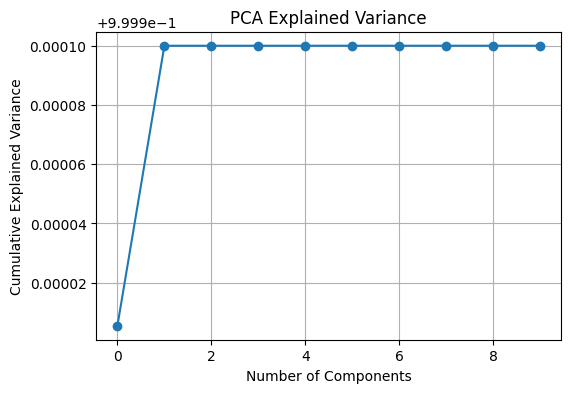

In [139]:
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

Depiction-

The table above shows the Principal Component (PC) loadings. Each row (PC1 to PC10) represents a principal component, and each column represents one of your original features. The values in the table indicate the strength and direction of the relationship between each feature and the corresponding principal component.


A larger absolute value in a cell means that the feature has a stronger influence on that specific principal component. For instance:

PC1 is almost entirely dominated by src_port (loading of 1.0), indicating that this feature is the primary driver of the first principal component.

PC2 is strongly influenced by dst_port (loading of 1.0).

PC3 shows significant contributions from protocol_type_TCP, protocol_type_UDP, src_ip_192.168.1.3, dst_ip_192.168.1.5, and dst_ip_192.168.1.6, suggesting that this component captures variations related to these network properties.
Similarly, other principal components are linear combinations of different features, where the loadings quantify each feature's contribution. For example, PC6 has strong negative loading on tcp_flags_FIN and strong positive loading on tcp_flags_SYN-ACK.

This analysis helps in understanding which original features contribute most to the variance captured by each principal component, providing insights into the underlying structure of your data.


In [140]:
#Using X_pca in ML_Models

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

ML_Models(X_train_pca, X_test_pca, y_train_pca, y_test_pca)

[LightGBM] [Info] Number of positive: 83, number of negative: 717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103750 -> initscore=-2.156235
[LightGBM] [Info] Start training from score -2.156235
Learning rate set to 0.009366
0:	learn: 0.6919234	total: 8.55ms	remaining: 8.54s
1:	learn: 0.6907846	total: 12ms	remaining: 6s
2:	learn: 0.6890679	total: 15.4ms	remaining: 5.13s
3:	learn: 0.6874693	total: 18.9ms	remaining: 4.7s
4:	learn: 0.6863841	total: 22.3ms	remaining: 4.43s
5:	learn: 0.6841832	total: 25.6ms	remaining: 4.23s
6:	learn: 0.6823659	total: 29ms	remaining: 4.11s
7:	learn: 0.6811863	total: 33ms	remaining: 4.09s
8:	learn: 0.6803636	total: 39ms	remaining: 4.29s
9:	learn: 0.6789890	total: 42.4ms	re

,model,accuracy,precision,recall,f1_score
0,LogReg,0.435,0.810320,0.435,0.547178
1,KNN,0.905,0.836439,0.905,0.869370
2,DecTreeCls,0.870,0.833560,0.870,0.851390
3,RanForCls,0.915,0.837225,0.915,0.874386
4,SGDCls,0.490,0.830416,0.490,0.596632
5,SVC,0.915,0.837225,0.915,0.874386
6,XGBoost,0.905,0.861556,0.905,0.877225
7,LightGBM,0.905,0.861556,0.905,0.877225
8,CatBoost,0.880,0.847795,0.880,0.862822


Observation-

1. When we apply PCA with 10 components, SVC, Random Forest gives best accuracy, f1_score which is 91.5% and 88% respectively.  

Let's apply neural network. LSTM or Bidirectioanl LSTM are not a good choice here as each rows are independent, non-dependent on time series.  

In [141]:
#set a random seed to achieve consistent results
tf.random.set_seed(0)

In [142]:
#Define CNN model

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')
])


In [143]:
#Train CNN model

model.compile(optimizer=Adam(learning_rate=0.0008), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 192 (768.00 B)

In [144]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32, validation_split=0.1, verbose=1)

loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - Precision: 0.1331 - Recall: 0.6038 - accuracy: 0.5315 - loss: 0.7937 - val_Precision: 0.1481 - val_Recall: 0.4000 - val_accuracy: 0.6133 - val_loss: 0.6568
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Precision: 0.1225 - Recall: 0.3586 - accuracy: 0.6543 - loss: 0.6197 - val_Precision: 0.2500 - val_Recall: 0.1000 - val_accuracy: 0.8400 - val_loss: 0.5849
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Precision: 0.2235 - Recall: 0.3004 - accuracy: 0.8099 - loss: 0.4803 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.5351
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Precision: 0.2268 - Recall: 0.1526 - accuracy: 0.8504 - loss: 0.4417 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8667 - val_loss: 0.4982
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Precision: 0.2155 - Recall: 0.1315 - accuracy: 0.8537 - loss: 0.4153 - val_Precision: 0.0000e+

In [145]:
#Checking with smote data

history=model.fit(X_train_sm,y_train_sm,epochs=100,batch_size=32, validation_split=0.1, verbose=1)

loss, accuracy, precision, recall = model.evaluate(X_test_sm, y_test_sm, verbose=0)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Precision: 0.9008 - Recall: 0.3402 - accuracy: 0.6510 - loss: 1.2635 - val_Precision: 0.7711 - val_Recall: 0.8649 - val_accuracy: 0.7986 - val_loss: 0.4391
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.8045 - Recall: 0.8475 - accuracy: 0.8231 - loss: 0.4271 - val_Precision: 0.8235 - val_Recall: 0.9459 - val_accuracy: 0.8681 - val_loss: 0.3323
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.8282 - Recall: 0.8350 - accuracy: 0.8331 - loss: 0.3869 - val_Precision: 0.8415 - val_Recall: 0.9324 - val_accuracy: 0.8750 - val_loss: 0.3024
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Precision: 0.8295 - Recall: 0.8621 - accuracy: 0.8443 - loss: 0.3495 - val_Precision: 0.8987 - val_Recall: 0.9595 - val_accuracy: 0.9236 - val_loss: 0.2812
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.8435 - Recall: 0.8859 - accuracy: 0.8625 - loss: 0.3251 - val_Precision: 0.8875 - val_Recall: 0.95

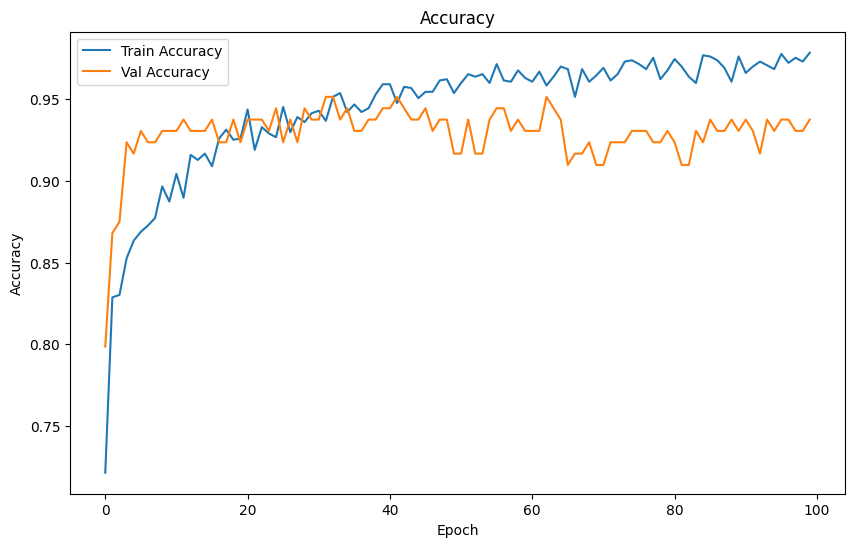

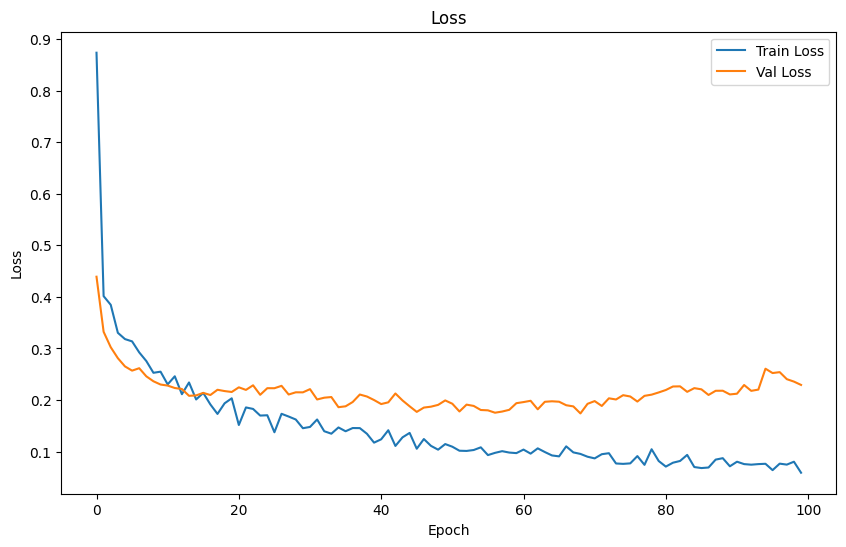

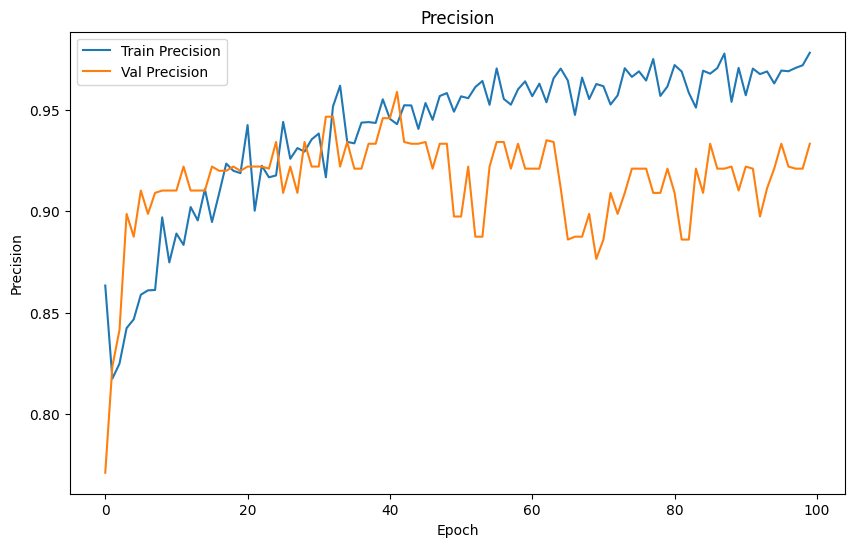

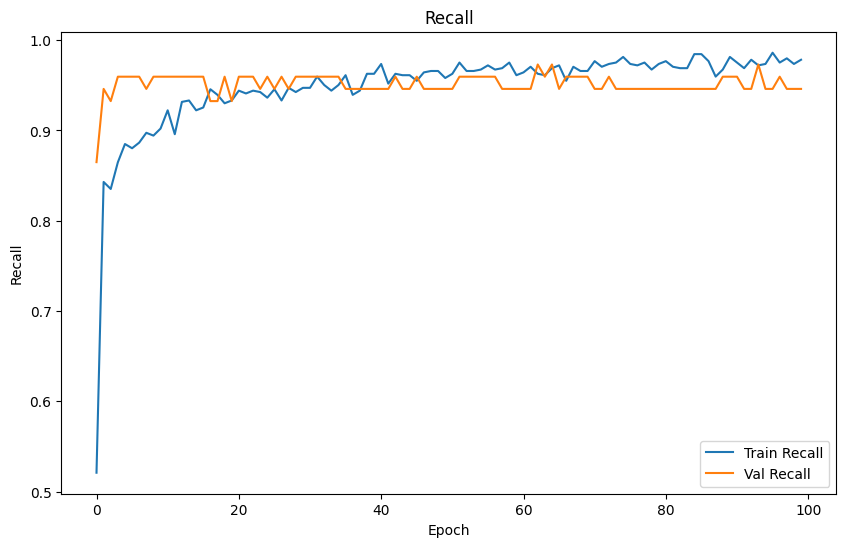

In [148]:
#Plot history accuracy, recall, precision

import matplotlib.pyplot as plt

# --- Plot Accuracy ---
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- Plot Loss ---
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# --- Plot Precision ---
plt.figure(figsize=(10,6))
plt.plot(history.history['Precision'], label='Train Precision')
plt.plot(history.history['val_Precision'], label='Val Precision')
plt.title("Precision")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()
plt.show()

# --- Plot Recall ---
plt.figure(figsize=(10,6))
plt.plot(history.history['Recall'], label='Train Recall')
plt.plot(history.history['val_Recall'], label='Val Recall')
plt.title("Recall")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.legend()
plt.show()


***Conclusion-***

i. We have selected a dataset which is having 1000 rows. This is comparatively small file.

ii. We applied label encoder for boolean fields.

iii. We applied standard scaler on numeric fields

iv. We applied almost all ML classifier models out of which SVC, randomforest classifier, boosting models are best models with respect to accuracy, f1_score.

v. As the classes are imbalanced, so we have applied smote.

vi. We have also applied PCA for dimensionality reduction to 10 components.

vii. We have applied neural network as well. It is giving very high accuracy with smote dataset.

viii. PCA accuracy reduction is very minimal close to 2 to 3%.

ix. If a bigger file size can be considered, SMOTE or PCA will have better difference. However, we have seen metric parameters difference with this smaller size of file as well.

x. There are some options like hyperparameter tuning, cross validation are not applied as part of this assignment. This is purely due to small size of the dataset and due to accuracy/f1-score more than 90%.